In [1]:
# importing Libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,5)

In [2]:
# read in thed file
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Let's see missing values in the data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
df['budget'] = df['budget'].fillna(df['budget'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
df.shape

(7574, 15)

In [11]:
# Changing datatype of budget and gross columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [17]:
df['yearextracted'] = df['released'].str.split(",").apply(lambda x:x[-1]).str.extractall('(\d+)').unstack().sum(axis=1).astype('int64')

### Exploratory Data Analysis

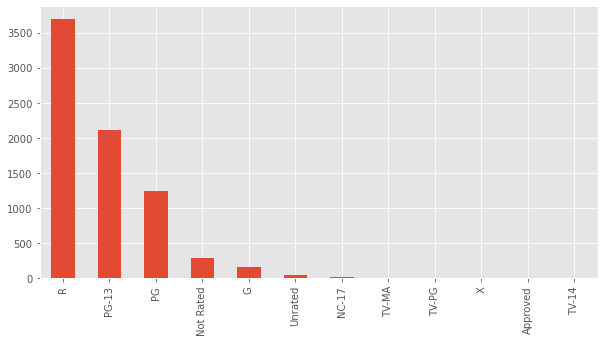

In [23]:
# Different ratings counts
df['rating'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:>

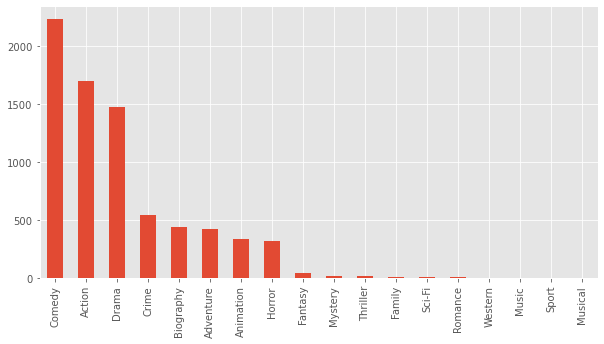

In [24]:
# Different genres movies
df['genre'].value_counts().plot(kind='bar')

<AxesSubplot:>

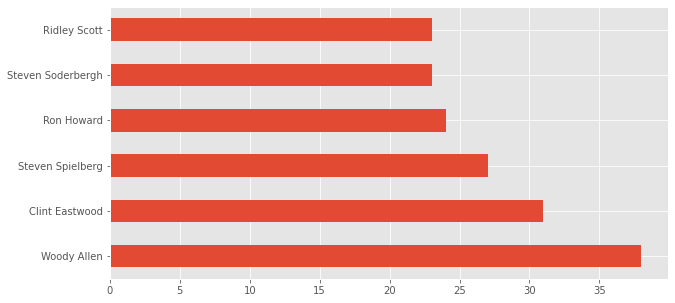

In [34]:
# Top 5 directors
df[(df['director']!='Directors')]['director'].value_counts()[:6].plot(kind='barh')

<AxesSubplot:>

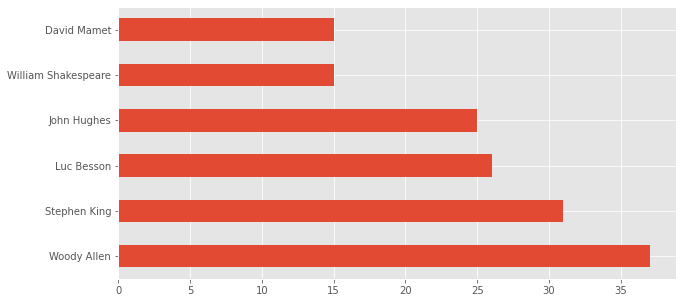

In [36]:
# Top 5 writers
df['writer'].value_counts()[:6].plot(kind='barh')

<AxesSubplot:>

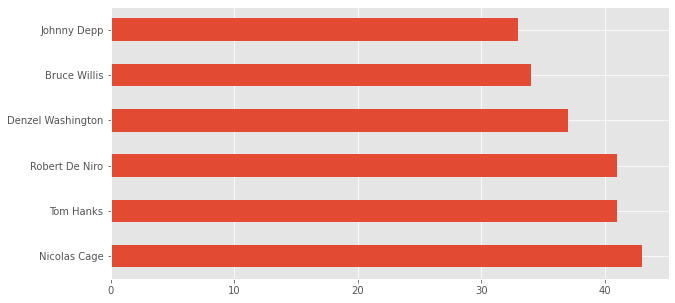

In [38]:
# Top 5 actors
df['star'].value_counts()[:6].plot(kind='barh')

<AxesSubplot:>

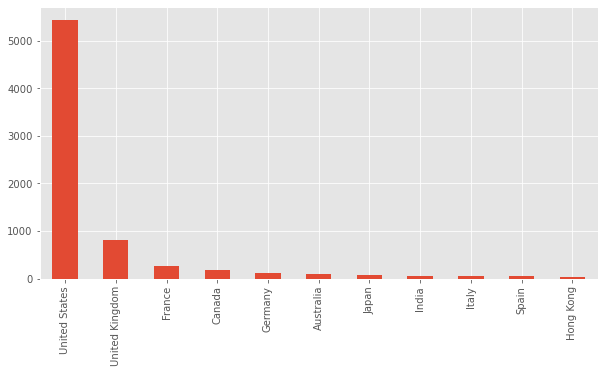

In [41]:
# Movies top 10 countries
df['country'].value_counts()[:11].plot(kind='bar')

<AxesSubplot:>

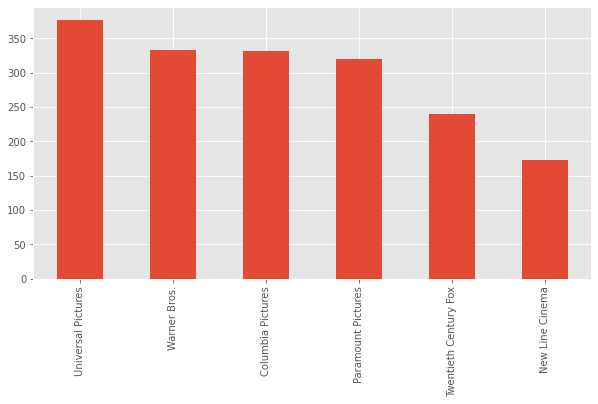

In [43]:
# Top 5 companies
df['company'].value_counts()[:6].plot(kind='bar')

<AxesSubplot:xlabel='rating'>

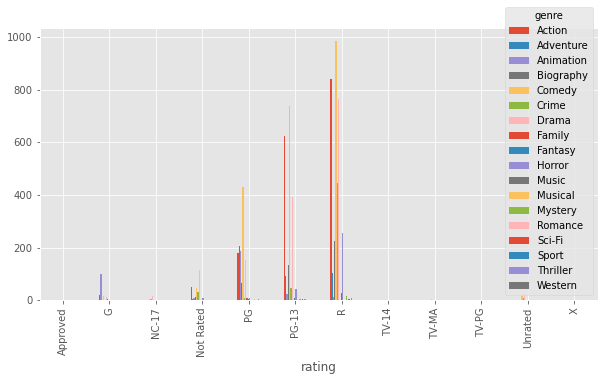

In [55]:
# Rating of different genere films
pd.crosstab(index=df['rating'],
            columns=df['genre']).plot(kind='bar')

Text(0, 0.5, 'Gross')

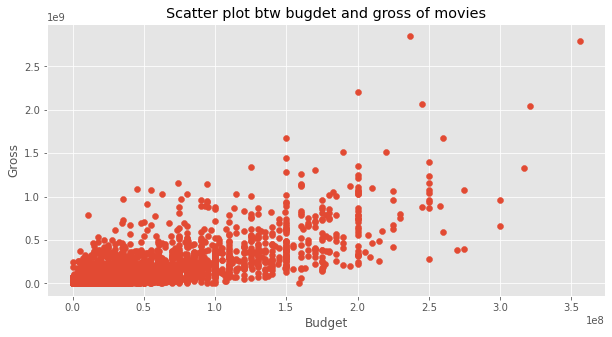

In [53]:
# Scatter plot btw Gross and budget
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Scatter plot btw bugdet and gross of movies')
plt.xlabel("Budget")
plt.ylabel("Gross")

<AxesSubplot:xlabel='budget', ylabel='gross'>

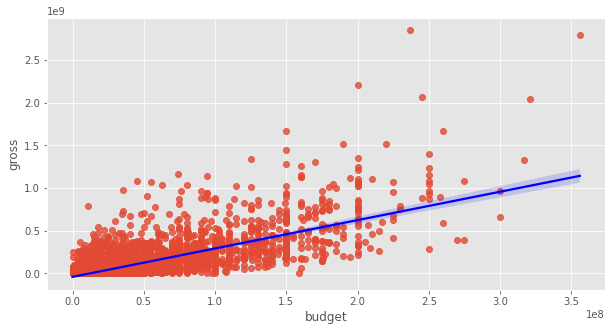

In [57]:
sns.regplot(x='budget',y='gross',data=df,line_kws={'color':'blue'})

In [58]:
df.corr()

,year,score,votes,budget,gross,runtime,yearextracted
year,1.000000,0.102346,0.226895,0.269153,0.254266,0.120676,0.997466
score,0.102346,1.000000,0.411931,0.064682,0.185063,0.400574,0.109815
votes,0.226895,0.411931,1.000000,0.421252,0.629322,0.309366,0.222317
budget,0.269153,0.064682,0.421252,1.000000,0.712614,0.266056,0.263071
gross,0.254266,0.185063,0.629322,0.712614,1.000000,0.241628,0.247622
runtime,0.120676,0.400574,0.309366,0.266056,0.241628,1.000000,0.120370
yearextracted,0.997466,0.109815,0.222317,0.263071,0.247622,0.120370,1.000000


<AxesSubplot:>

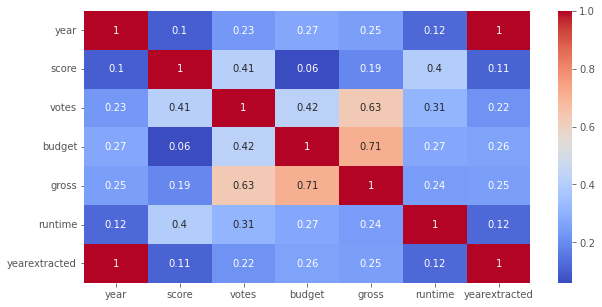

In [62]:
sns.heatmap(round(df.corr(),2),annot=True,cmap='coolwarm')

In [63]:
# making a dataframe after transforming categorical variables int numerical for checking correlations

df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [64]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearextracted
0,6506,6,6,1980,1685,8.4,927000.0,2544,3958,1022,54,19000000,46998772,2273,146.0,1980
1,5498,6,1,1980,1472,5.8,65000.0,2233,1612,316,55,4500000,58853106,710,104.0,1980
2,5073,4,0,1980,1751,8.7,1200000.0,1093,2534,1708,55,18000000,538375067,1505,124.0,1980
3,282,4,4,1980,1472,7.7,221000.0,1279,1975,2197,55,3500000,83453539,1769,88.0,1980
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000,39846344,1736,98.0,1980


<AxesSubplot:>

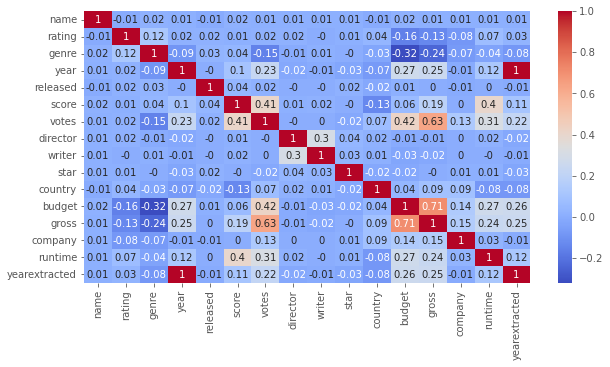

In [65]:
sns.heatmap(round(df_numerized.corr(),2),annot=True,cmap='coolwarm')

### Budget and votes have high corelations with the gross of the movie